# **Анализ текстовых данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
df = pd.read_csv("train.csv")

print(df.head())

       ID                                               text          src  \
0   26739                       smaller than in description.    rureviews   
1  198426  Слева от меня Алексей Ильмухин. Путешественник...  rusentiment   
2  172615  Ребёнок в садик отходил год, из них пол года п...          geo   
3  246532                                    Замерзла на -15  perekrestok   
4  209852  Как всегда, название не соответствует истинном...    kinopoisk   

   label  
0      0  
1      1  
2      2  
3      2  
4      0  


In [9]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232366 entries, 0 to 232365
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      232366 non-null  int64 
 1   text    232366 non-null  object
 2   src     232366 non-null  object
 3   label   232366 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.1+ MB


In [10]:
# пропуски
print(df.isna().sum())

ID       0
text     0
src      0
label    0
dtype: int64


In [11]:
# длина
df["text"] = df["text"].astype(str)

df["char_len"] = df["text"].apply(len)
df["word_len"] = df["text"].apply(lambda x: len(x.split()))

print("\nСимволы")
print(df["char_len"].describe())

print("\nСлова")
print(df["word_len"].describe())


Символы
count    232366.000000
mean        340.085632
std         371.580426
min           1.000000
25%          72.000000
50%         175.000000
75%         483.000000
max        1500.000000
Name: char_len, dtype: float64

Слова
count    232366.000000
mean         51.190049
std          56.174178
min           0.000000
25%          11.000000
50%          26.000000
75%          73.000000
max         273.000000
Name: word_len, dtype: float64



Распределение классов:
label_name
NEGATIVE    0.334081
POSITIVE    0.333500
NEUTRAL     0.332420
Name: proportion, dtype: float64


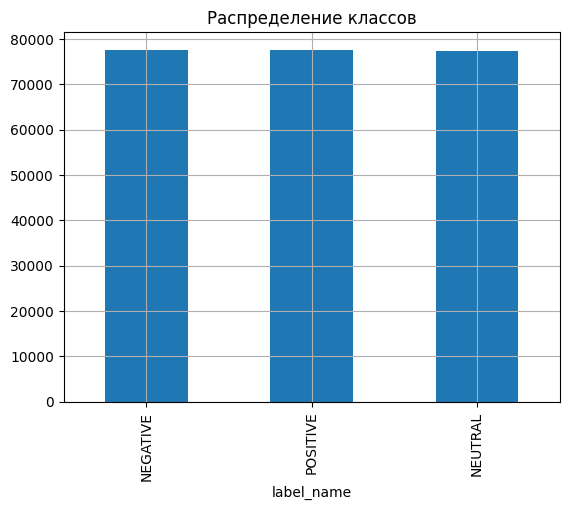

In [12]:
# распределение классов
label_map = {
    0: "NEUTRAL",
    1: "POSITIVE",
    2: "NEGATIVE"
}

df["label_name"] = df["label"].map(label_map)

print("\nРаспределение классов:")
print(df["label_name"].value_counts(normalize=True))

# Гистограмма классов
plt.figure()
df["label_name"].value_counts().plot(kind="bar")
plt.title("Распределение классов")
plt.grid(True)
plt.show()

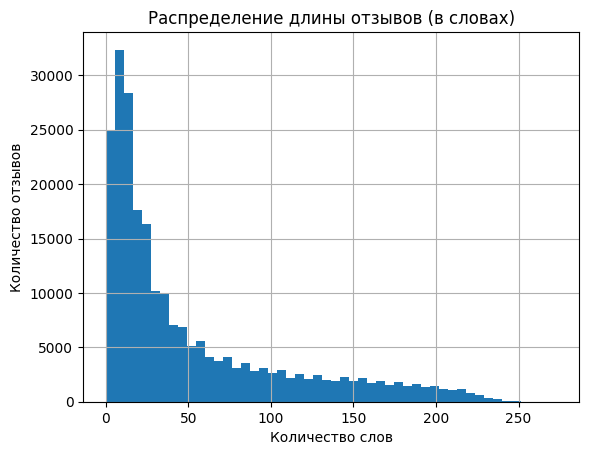

In [13]:
# распределение длины текста
plt.figure()
plt.hist(df["word_len"], bins=50)
plt.title("Распределение длины отзывов (в словах)")
plt.xlabel("Количество слов")
plt.ylabel("Количество отзывов")
plt.grid(True)
plt.show()

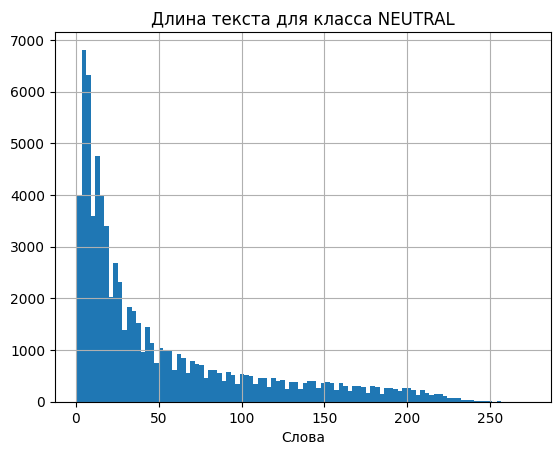

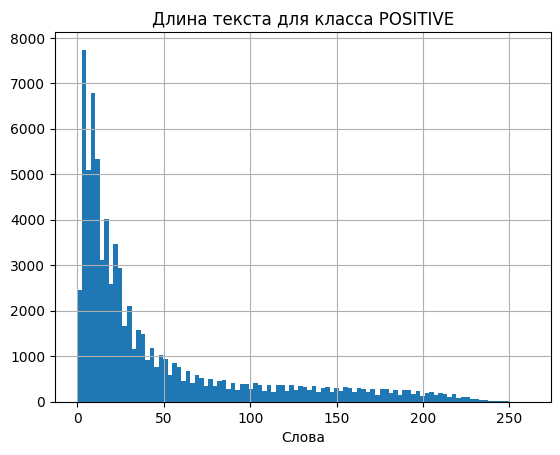

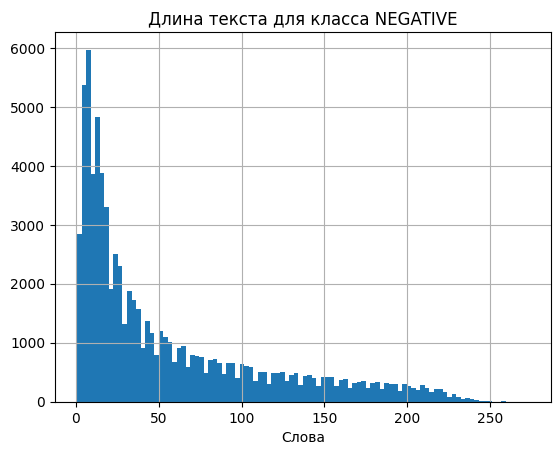

In [29]:
for label in sorted(df["label"].unique()):
    subset = df[df["label"] == label]
    plt.figure()
    plt.hist(subset["word_len"], bins=100)
    plt.title(f"Длина текста для класса {label_map[label]}")
    plt.xlabel("Слова")
    plt.grid(True)
    plt.show()


 Источники данных:
src
rureviews                    69180
geo                          50631
perekrestok                  43577
anime                        31272
kinopoisk                    15209
rusentiment                   9408
linis                         5721
ru-reviews-classification     3786
sber                          1645
news                          1203
bank                           734
Name: count, dtype: int64


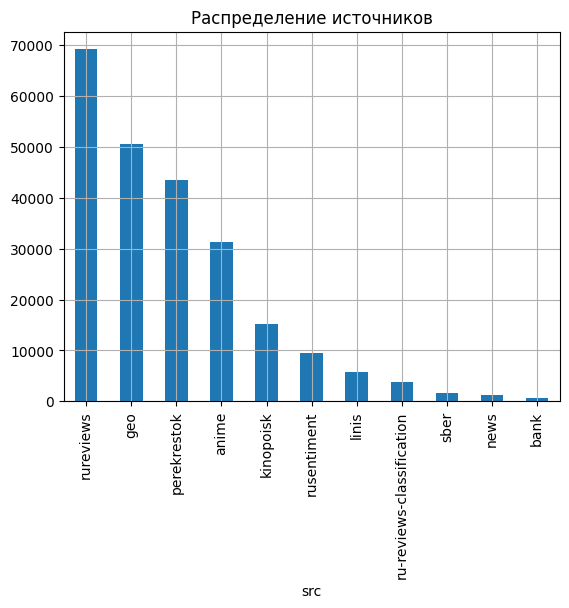


 Источник vs Класс:
label_name                 NEGATIVE   NEUTRAL  POSITIVE
src                                                    
anime                      0.334389  0.333269  0.332342
bank                       0.325613  0.336512  0.337875
geo                        0.332879  0.333669  0.333452
kinopoisk                  0.334276  0.331711  0.334013
linis                      0.335431  0.333333  0.331236
news                       0.330840  0.340815  0.328346
perekrestok                0.334374  0.331758  0.333869
ru-reviews-classification  0.367142  0.283677  0.349181
rureviews                  0.333059  0.334172  0.332770
rusentiment                0.334184  0.330570  0.335247
sber                       0.323404  0.339818  0.336778


In [32]:
if "src" in df.columns:
    print("\n Источники данных:")
    print(df["src"].value_counts())

    plt.figure()
    df["src"].value_counts().plot(kind="bar")
    plt.title("Распределение источников")
    plt.grid(True)
    plt.show()

    print("\n Источник vs Класс:")
    print(pd.crosstab(df["src"], df["label_name"], normalize="index"))

In [33]:
duplicates = df["text"].duplicated().sum()
print(f"\n Дублирующиеся тексты: {duplicates}")


 Дублирующиеся тексты: 40


In [34]:
short_texts = df[df["word_len"] <= 2]
print(f"\n Очень короткие отзывы (<=2 слов): {len(short_texts)}")


 Очень короткие отзывы (<=2 слов): 5890


In [35]:
all_words = " ".join(df["text"]).lower().split()
word_freq = Counter(all_words)

print("\n 20 самых частых слов:")
print(word_freq.most_common(20))



 20 самых частых слов:
[('и', 403926), ('не', 345784), ('в', 304301), ('на', 201700), ('что', 145711), ('с', 120877), ('но', 112967), ('это', 88744), ('очень', 83994), ('как', 82857), ('я', 80293), ('-', 76690), ('а', 74991), ('по', 67420), ('все', 58371), ('за', 56686), ('из', 54688), ('так', 52190), ('к', 47598), ('для', 43746)]
